In [64]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from utils_functions import MLFunctions

In [76]:
rf_instance = RandomForestClassifier(random_state=42)
lr_instance = LogisticRegression(random_state=42)
gb_instance = GradientBoostingClassifier(random_state=42)
svm_instance = SVC(random_state=42, probability=True)
xgboost_instance = XGBClassifier()

In [77]:
df_data = pd.read_csv("StandardScaler/X_train_StandardScaler.csv")
df_data = df_data.fillna(df_data.mean())
df_values = df_data.drop(columns=["label_gdm"])
response = df_data["label_gdm"].values

In [78]:
X_train, X_val, y_train, y_val = train_test_split(df_values, response, stratify=response, random_state=42, test_size=.2)

In [79]:
count_0 = 0
count_1 = 0

for value in y_val:
    if value==0:
        count_0+=1
    else:
        count_1+=1
print(count_0, count_1)

193 40


- Entrenamiento sin validación cruzada

In [80]:
rf_instance = MLFunctions.train_model(rf_instance, X_train, y_train)
lr_instance = MLFunctions.train_model(lr_instance, X_train, y_train)
gb_instance = MLFunctions.train_model(gb_instance, X_train, y_train)
svm_instance = MLFunctions.train_model(svm_instance, X_train, y_train)
xgboost_instance = MLFunctions.train_model(xgboost_instance, X_train, y_train)


In [81]:
list_metrics = [
    MLFunctions.get_metrics(X_val, y_val, rf_instance, "RandomForest"),
    MLFunctions.get_metrics(X_val, y_val, lr_instance, "LogisticRegression"),
    MLFunctions.get_metrics(X_val, y_val, gb_instance, "GradientBoosting"),
    MLFunctions.get_metrics(X_val, y_val, svm_instance, "SVC"),
    MLFunctions.get_metrics(X_val, y_val, xgboost_instance, "XGB"),
]

df_metrics_val = pd.DataFrame(list_metrics)
df_metrics_val

,model_name,accuracy,f1_score,roc_auc,precision,recall
0,RandomForest,0.828326,0.090909,0.641775,0.500000,0.050
1,LogisticRegression,0.819742,0.086957,0.694041,0.333333,0.050
2,GradientBoosting,0.854077,0.346154,0.750259,0.750000,0.225
3,SVC,0.828326,0.000000,0.591062,0.000000,0.000
4,XGB,0.836910,0.296296,0.704534,0.571429,0.200


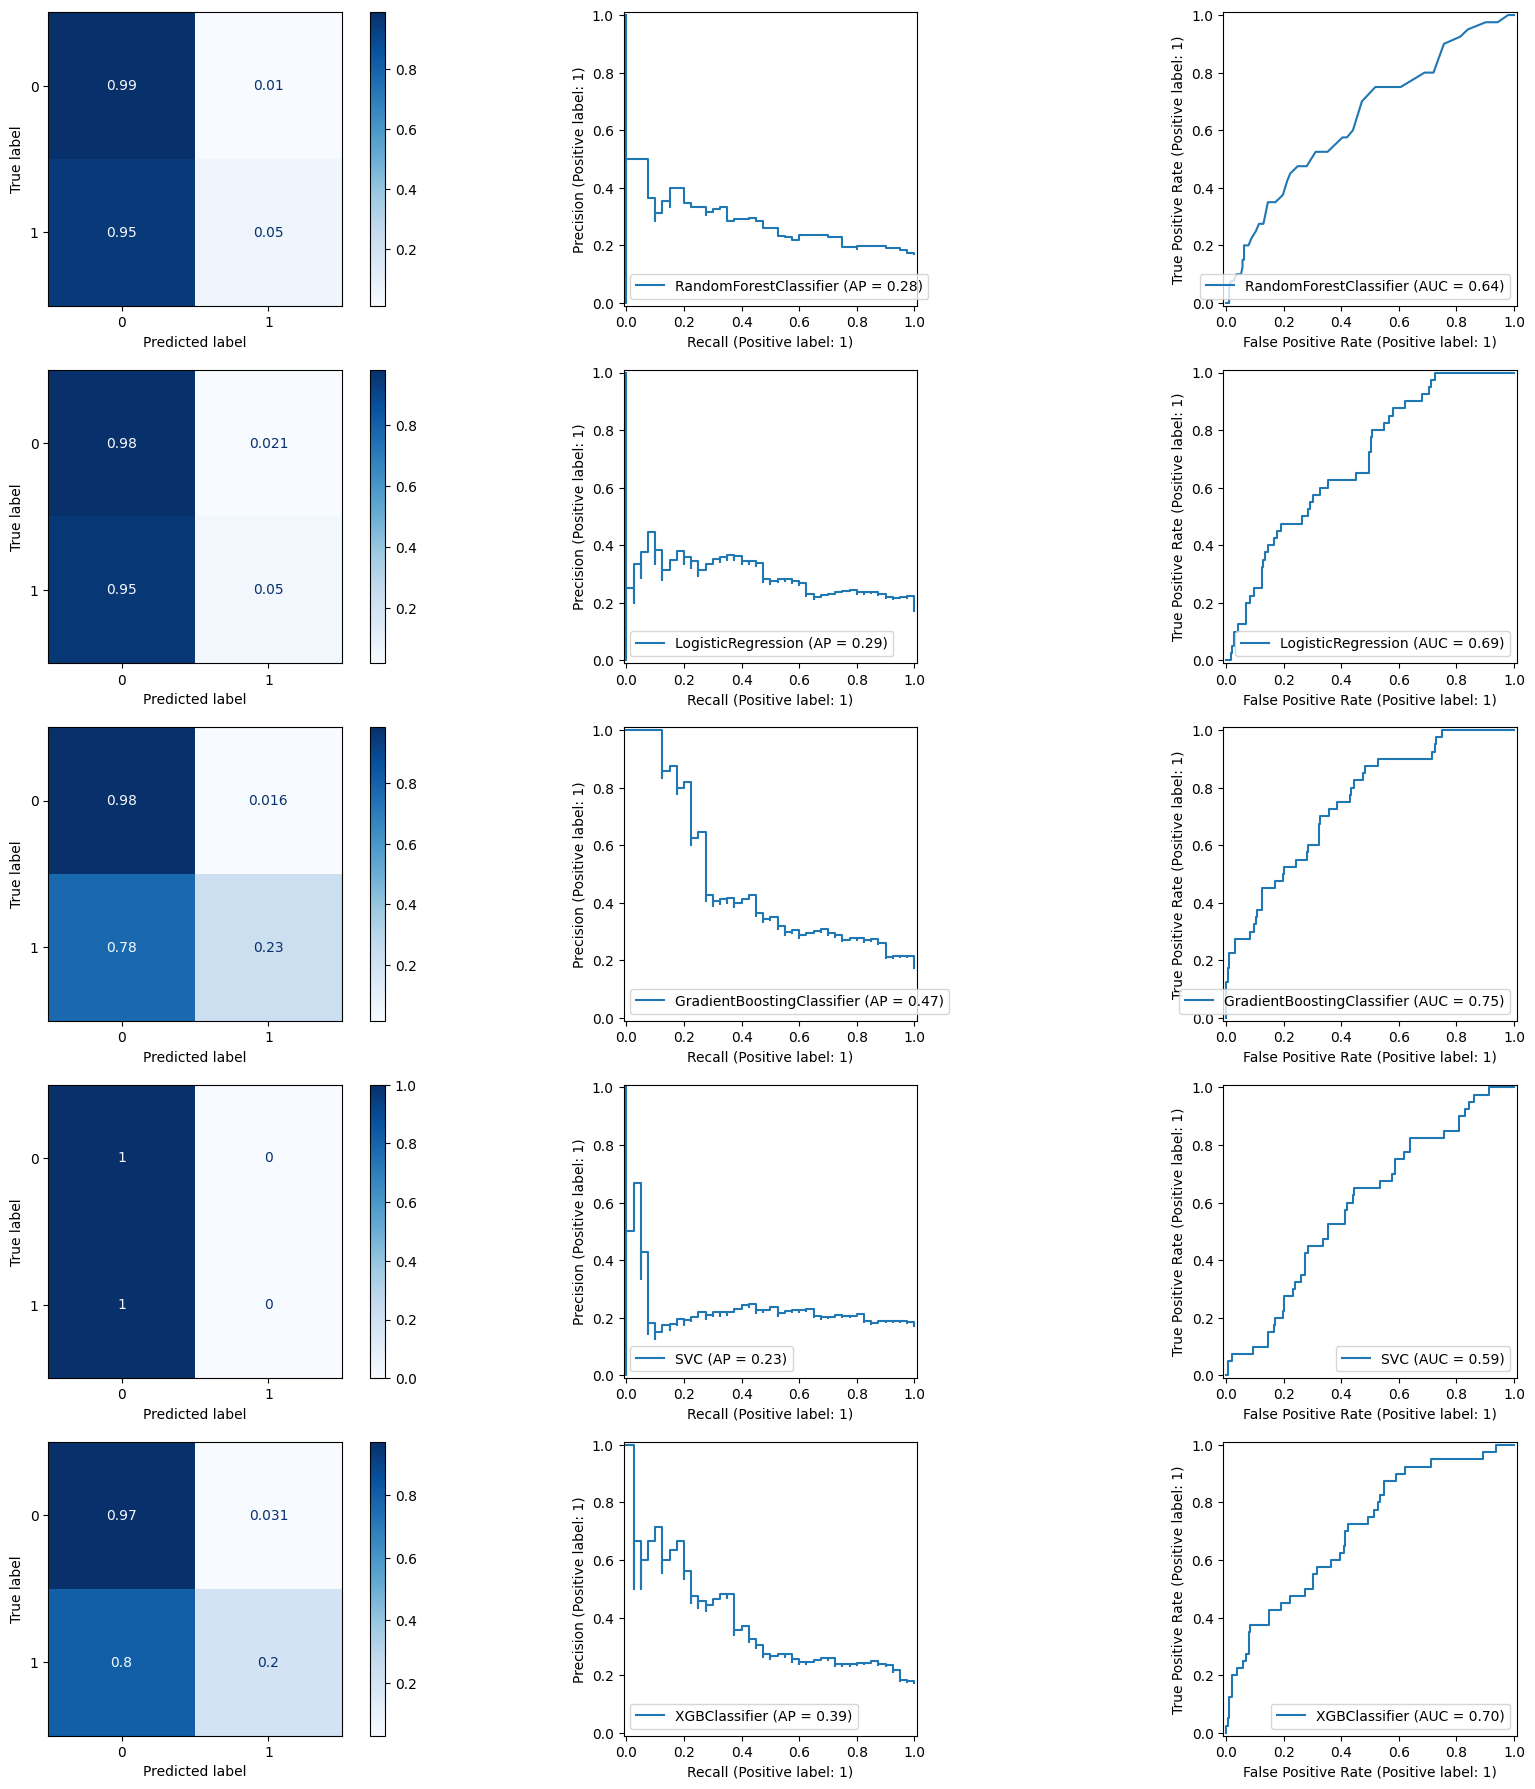

In [82]:
_, axis = plt.subplots(5, 3, figsize=(18, 18))

MLFunctions.plot_models_comparison(rf_instance, X_val, y_val, axis[0][0], axis[0][1], axis[0][2])
MLFunctions.plot_models_comparison(lr_instance, X_val, y_val, axis[1][0], axis[1][1], axis[1][2])
MLFunctions.plot_models_comparison(gb_instance, X_val, y_val, axis[2][0], axis[2][1], axis[2][2])
MLFunctions.plot_models_comparison(svm_instance, X_val, y_val, axis[3][0], axis[3][1], axis[3][2])
MLFunctions.plot_models_comparison(xgboost_instance, X_val, y_val, axis[4][0], axis[4][1], axis[4][2])

plt.tight_layout()